In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta

In [2]:
#LOADING DATA
filename = os.path.join(os.getcwd(), "/Users/dariakhotunitskaya/Desktop/School/jpmc_data/fraudTest.csv")
test=pd.read_csv(filename,low_memory=False)

filename =os.path.join(os.getcwd(), "/Users/dariakhotunitskaya/Desktop/School/jpmc_data/fraudTrain.csv")
train=pd.read_csv(filename,low_memory=False)


In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train.shape

(1296675, 23)

In [5]:
test.shape

(555719, 23)

In [6]:
#changing gender to 1 and 2 int
test['gender'] = test['gender'].replace({'M':1, 'F': 0})
test['gender'].unique()

train['gender'] = train['gender'].replace({'M':1, 'F': 0})
train['gender'].unique()


array([0, 1])

In [8]:
#determining age from time of transaction
train[['Trans_Date', 'Trans_Time']] = train['trans_date_trans_time'].str.split(' ', n=1).tolist()

train['dob'] = pd.to_datetime(train['dob'])
train['Trans_Date'] = pd.to_datetime(train['Trans_Date'])
train['Age'] = train.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


train.drop(columns=['dob'], inplace=True, axis=1)


test[['Trans_Date', 'Trans_Time']] = test['trans_date_trans_time'].str.split(' ', n=1).tolist()

test['dob'] = pd.to_datetime(test['dob'])
test['Trans_Date'] = pd.to_datetime(test['Trans_Date'])
test['Age'] = test.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


test.drop(columns=['dob'], inplace=True, axis=1)

In [10]:
#creating new loaction feature from lat and long

train['location_matches'] = np.where((abs(train['lat'] - train['merch_lat']) < 0.5) & (abs(train['merchain['long'] - tra_long']) < 0.5), True, False)

#dropping the lat,long,merch lat, and merch long
train.drop('lat', inplace=True, axis=1)
train.drop('long', inplace=True, axis=1)
train.drop('merch_long', inplace=True, axis=1)
train.drop('merch_lat', inplace=True, axis=1)


test['location_matches'] = np.where((abs(test['lat'] - test['merch_lat']) < 0.5) & (abs(test['long'] - test['merch_long']) < 0.5), True, False)

test.drop('lat', inplace=True, axis=1)
test.drop('long', inplace=True, axis=1)
test.drop('merch_long', inplace=True, axis=1)
test.drop('merch_lat', inplace=True, axis=1)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1437666662.py, line 3)

In [11]:
#dropping unnamed
train.drop('Unnamed: 0', inplace=True, axis=1)
test.drop('Unnamed: 0', inplace=True, axis=1)


In [12]:
# Convert string datetime to pandas datetime format for later use
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['hour'] = train['trans_date_trans_time'].dt.hour
train['minute'] = train['trans_date_trans_time'].dt.minute
train['second'] = train['trans_date_trans_time'].dt.second

# Drop the original datetime column
train = train.drop(columns=['trans_date_trans_time'])


# Convert string datetime to pandas datetime format
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute
test['second'] = test['trans_date_trans_time'].dt.second

# Drop the original datetime column
test = test.drop(columns=['trans_date_trans_time'])

In [13]:
train.dtypes

cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                 int64
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
Trans_Date    datetime64[ns]
Trans_Time            object
Age                    int64
year                   int32
month                  int32
day                    int32
hour                   int32
minute                 int32
second                 int32
dtype: object

In [14]:
#one hot encoding for category
train = pd.get_dummies(train, columns=['category'])


In [15]:
test = pd.get_dummies(test, columns=['category'])

In [16]:
#droppig columns that are not needed
columns_to_drop = ['city','year','day','month','hour','minute','second']
train =train.drop(columns=columns_to_drop)
test =test.drop(columns=columns_to_drop)

In [17]:
train.dtypes

cc_num                              int64
merchant                           object
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
Trans_Date                 datetime64[ns]
Trans_Time                         object
Age                                 int64
category_entertainment               bool
category_food_dining                 bool
category_gas_transport            

Random under-sampling:
is_fraud
0    22518
1     7506
Name: count, dtype: int64


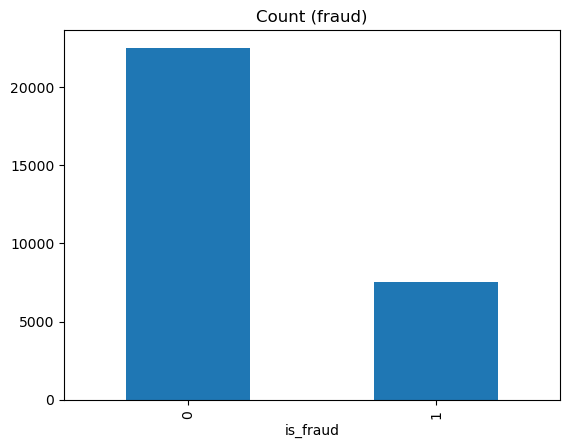

In [18]:
# Class count
train_0, train_1 = train['is_fraud'].value_counts()

# Dividing by class
train_class_0 = train[train['is_fraud'] == 0]
train_class_1 = train[train['is_fraud'] == 1]

# Performing random under-sampling of the majority class (class 0)
train_class_0_under = train_class_0.sample(train_1*3)

# Concatenate the under-sampled majority class with the minority class (class 1)
train_under = pd.concat([train_class_0_under, train_class_1], axis=0)


print('Random under-sampling:')
print(train_under['is_fraud'].value_counts())

train_under['is_fraud'].value_counts().plot(kind='bar', title='Count (fraud)');


Random under-sampling:
is_fraud
0    4290
1    2145
Name: count, dtype: int64


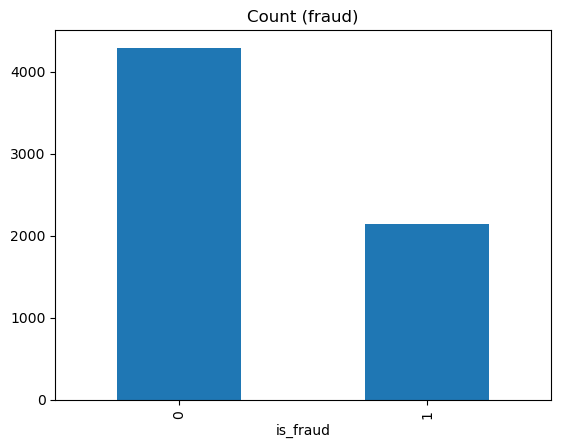

In [19]:
# Class count
test_0, test_1 = test['is_fraud'].value_counts()

# Dividing by class
test_class_0 = test[test['is_fraud'] == 0]
test_class_1 = test[test['is_fraud'] == 1]

# Performing random under-sampling of the majority class (class 0)
test_class_0_under = test_class_0.sample(test_1*2)#change * 

# Concatenate the under-sampled majority class with the minority class (class 1)
test_under = pd.concat([test_class_0_under, test_class_1], axis=0)


print('Random under-sampling:')
print(test_under['is_fraud'].value_counts())

test_under['is_fraud'].value_counts().plot(kind='bar', title='Count (fraud)');


In [20]:
#correlation 
train_under.corr(numeric_only=True) 

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
cc_num,1.000000,0.009343,0.015696,0.041059,-0.055393,-0.044534,-0.003002,0.007672,-0.054568,-0.044281,...,0.004034,-0.008091,-0.000715,-0.013056,0.009131,0.000269,-0.000120,0.010206,0.006433,-0.001433
amt,0.009343,1.000000,0.054606,-0.018726,0.006686,0.014768,0.019094,-0.011743,0.005808,0.015092,...,0.022844,-0.098882,-0.102081,-0.115972,0.186185,-0.070021,-0.110309,0.384645,0.128777,-0.025319
gender,0.015696,0.054606,1.000000,-0.051990,0.038246,0.039709,-0.022558,0.001150,0.037510,0.039233,...,0.038760,0.000581,-0.010125,-0.034485,0.020176,-0.011461,-0.049167,0.038651,-0.022921,0.008475
zip,0.041059,-0.018726,-0.051990,1.000000,-0.106068,-0.910270,0.098727,-0.003129,-0.106120,-0.909435,...,0.004644,0.003439,0.002533,-0.003482,-0.006212,0.008013,0.003881,-0.002916,-0.008783,-0.003617
lat,-0.055393,0.006686,0.038246,-0.106068,1.000000,-0.032708,-0.165421,0.003485,0.993647,-0.032869,...,0.001910,-0.005107,-0.001382,-0.007309,0.004873,-0.001498,-0.008050,0.002910,-0.015723,0.003316
long,-0.044534,0.014768,0.039709,-0.910270,-0.032708,1.000000,-0.067606,0.004488,-0.031779,0.999129,...,-0.009919,-0.003369,0.001880,0.005022,0.004063,-0.007406,0.000733,0.000656,0.010519,0.000867
city_pop,-0.003002,0.019094,-0.022558,0.098727,-0.165421,-0.067606,1.000000,-0.017446,-0.164862,-0.067477,...,0.000184,-0.001039,-0.004912,-0.002876,0.005312,-0.000103,-0.002548,0.010733,0.009507,-0.004156
unix_time,0.007672,-0.011743,0.001150,-0.003129,0.003485,0.004488,-0.017446,1.000000,0.003338,0.004577,...,-0.000863,0.013914,0.006986,-0.007438,0.007160,0.001811,-0.002875,-0.003872,0.003904,-0.012455
merch_lat,-0.054568,0.005808,0.037510,-0.106120,0.993647,-0.031779,-0.164862,0.003338,1.000000,-0.031904,...,0.001620,-0.005154,-0.001020,-0.007088,0.005174,-0.001680,-0.007808,0.003043,-0.015573,0.003659
merch_long,-0.044281,0.015092,0.039233,-0.909435,-0.032869,0.999129,-0.067477,0.004577,-0.031904,1.000000,...,-0.009843,-0.003196,0.001858,0.005279,0.004314,-0.007669,0.000361,0.001115,0.010066,0.001100


In [21]:
test_under.corr(numeric_only=True) 

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
cc_num,1.000000,-0.033108,-0.029877,0.021267,-0.059199,-0.046001,-0.031481,-0.063027,-0.057422,-0.046451,...,-0.018284,0.009882,0.015257,0.006099,0.000242,0.015120,0.007723,-0.018446,-0.001358,-0.014999
amt,-0.033108,1.000000,0.061769,-0.021753,0.044044,0.003243,-0.013935,-0.057801,0.044911,0.003390,...,0.003276,-0.119740,-0.109004,-0.132301,0.208776,-0.086335,-0.130603,0.440996,0.125226,-0.040883
gender,-0.029877,0.061769,1.000000,-0.083485,0.050303,0.065081,-0.020175,0.009335,0.051374,0.064447,...,0.030192,-0.026295,-0.013052,-0.007130,0.026751,-0.023625,-0.036369,0.023748,0.003583,-0.004540
zip,0.021267,-0.021753,-0.083485,1.000000,-0.081101,-0.910392,0.059495,0.009325,-0.082481,-0.909497,...,0.002788,-0.009739,-0.016827,-0.004805,-0.012025,-0.032352,0.013653,-0.002889,0.000935,0.001064
lat,-0.059199,0.044044,0.050303,-0.081101,1.000000,-0.036273,-0.108476,0.017481,0.993491,-0.035639,...,0.010837,0.004778,-0.020043,0.001378,0.003714,0.006652,0.001165,0.011531,-0.002849,-0.012949
long,-0.046001,0.003243,0.065081,-0.910392,-0.036273,1.000000,-0.044294,-0.016315,-0.033160,0.999136,...,-0.005892,0.003026,0.020906,0.008836,0.010287,0.029356,-0.003367,-0.004151,0.002844,0.002140
city_pop,-0.031481,-0.013935,-0.020175,0.059495,-0.108476,-0.044294,1.000000,0.017852,-0.109184,-0.044648,...,-0.019778,-0.021078,0.000403,0.007616,0.017960,-0.008967,-0.002946,-0.001133,-0.012421,-0.002298
unix_time,-0.063027,-0.057801,0.009335,0.009325,0.017481,-0.016315,0.017852,1.000000,0.017948,-0.016392,...,-0.022564,0.003938,0.013814,0.036679,-0.016172,-0.006234,-0.011010,-0.019799,0.006204,0.010732
merch_lat,-0.057422,0.044911,0.051374,-0.082481,0.993491,-0.033160,-0.109184,0.017948,1.000000,-0.032536,...,0.008947,0.007598,-0.020554,0.000852,0.004351,0.007492,0.001928,0.013246,-0.004279,-0.012459
merch_long,-0.046451,0.003390,0.064447,-0.909497,-0.035639,0.999136,-0.044648,-0.016392,-0.032536,1.000000,...,-0.006437,0.002614,0.021078,0.009152,0.011051,0.029773,-0.003108,-0.003379,0.002332,0.001746


<Axes: >

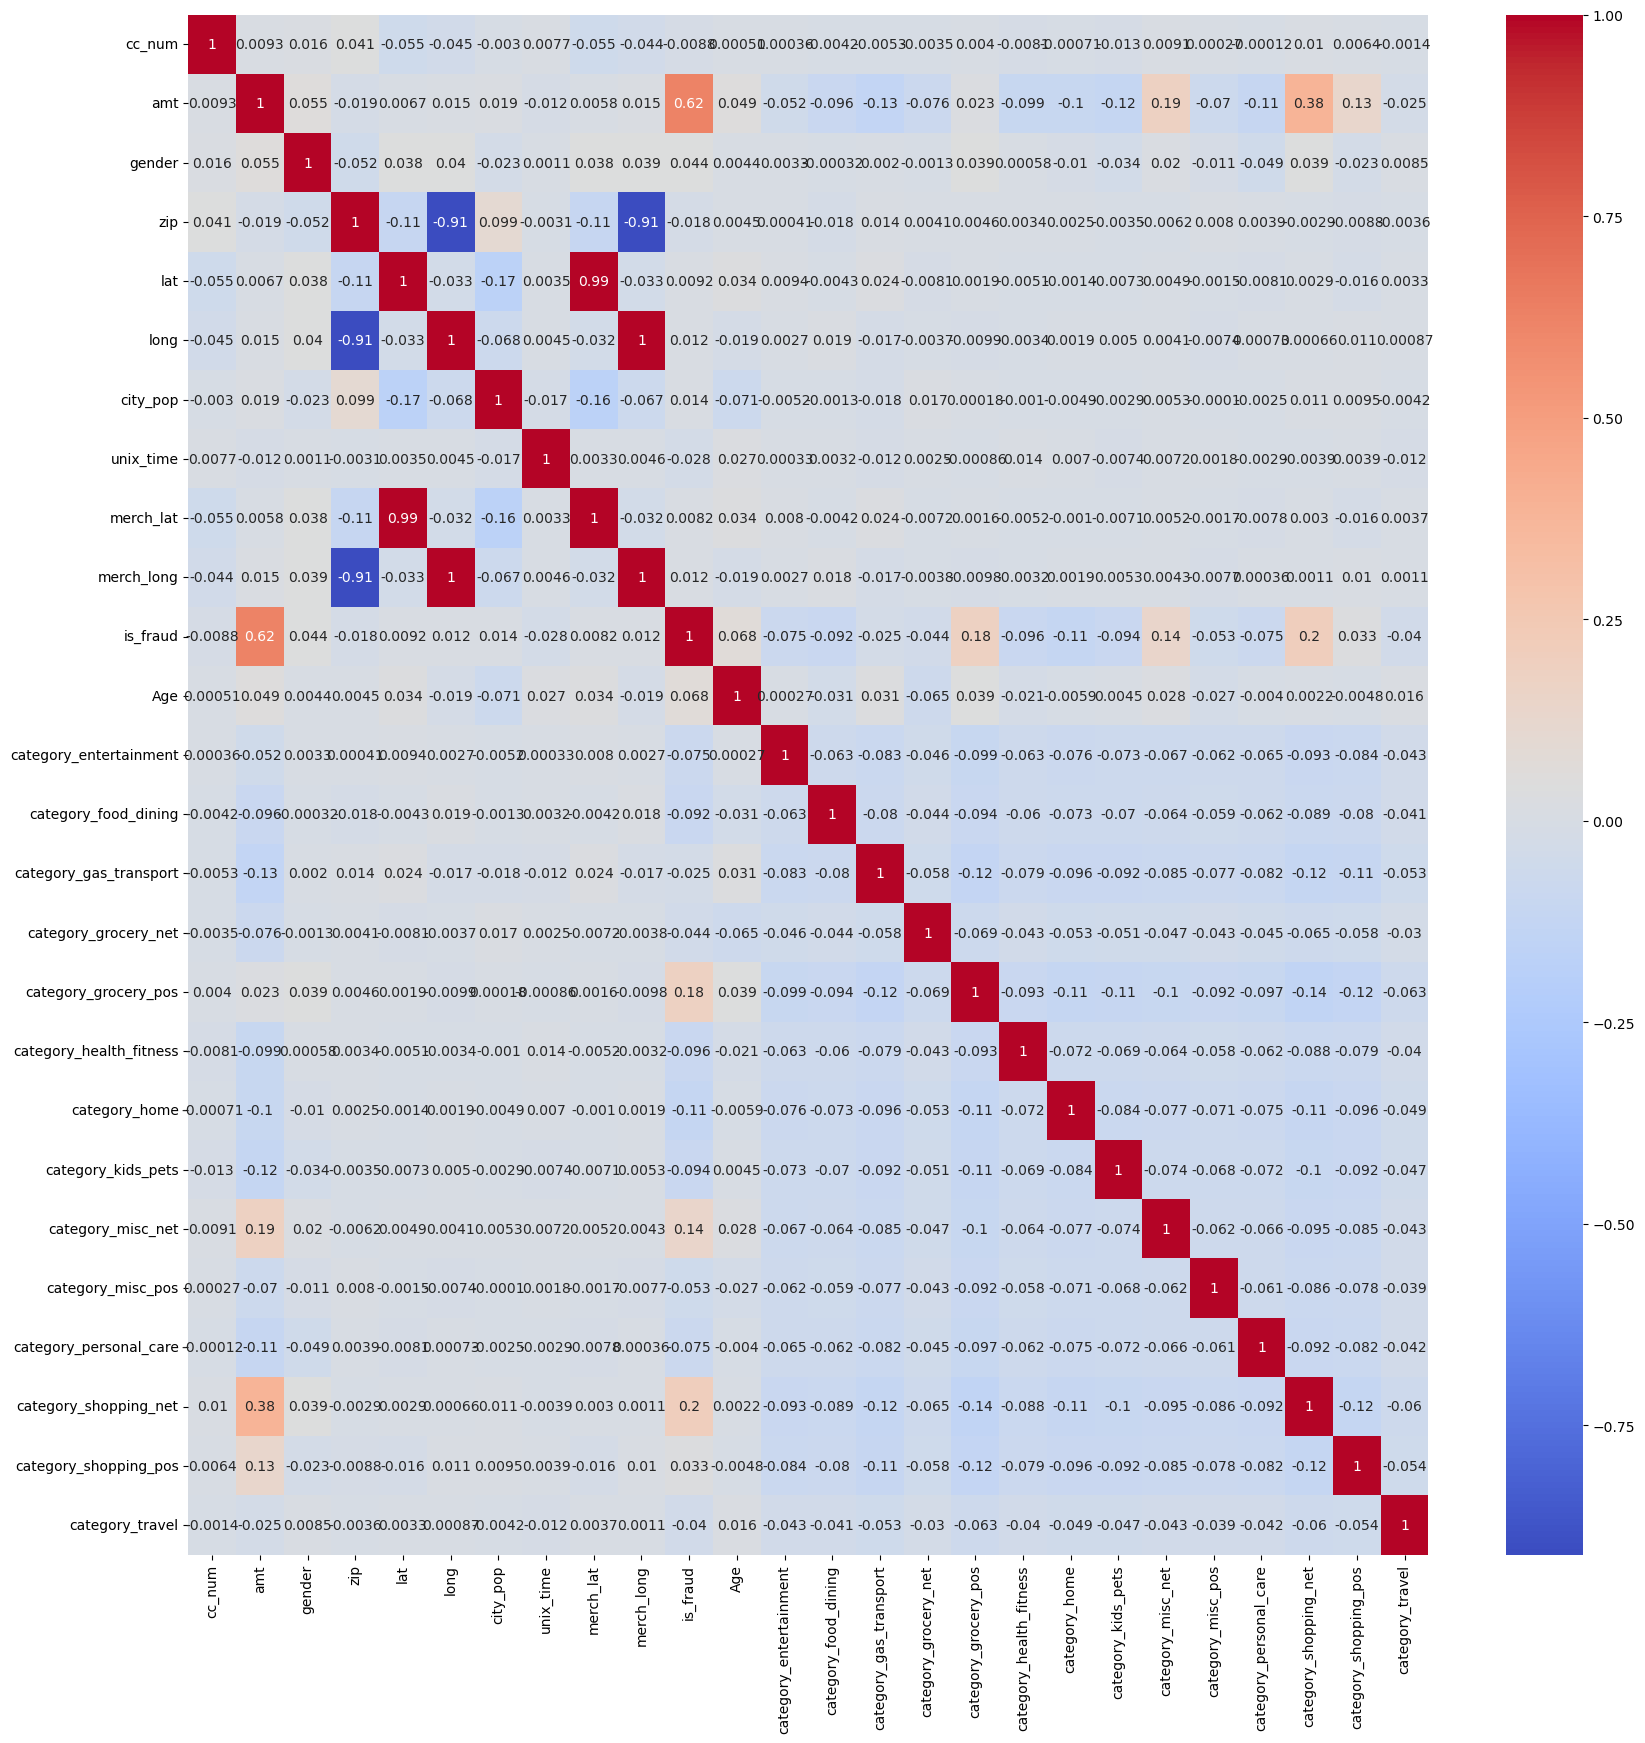

In [22]:
# Heatmap
plt.figure(figsize=[20,20])
sns.heatmap( train_under.corr(numeric_only=True),annot=True, cmap='coolwarm')

<Axes: >

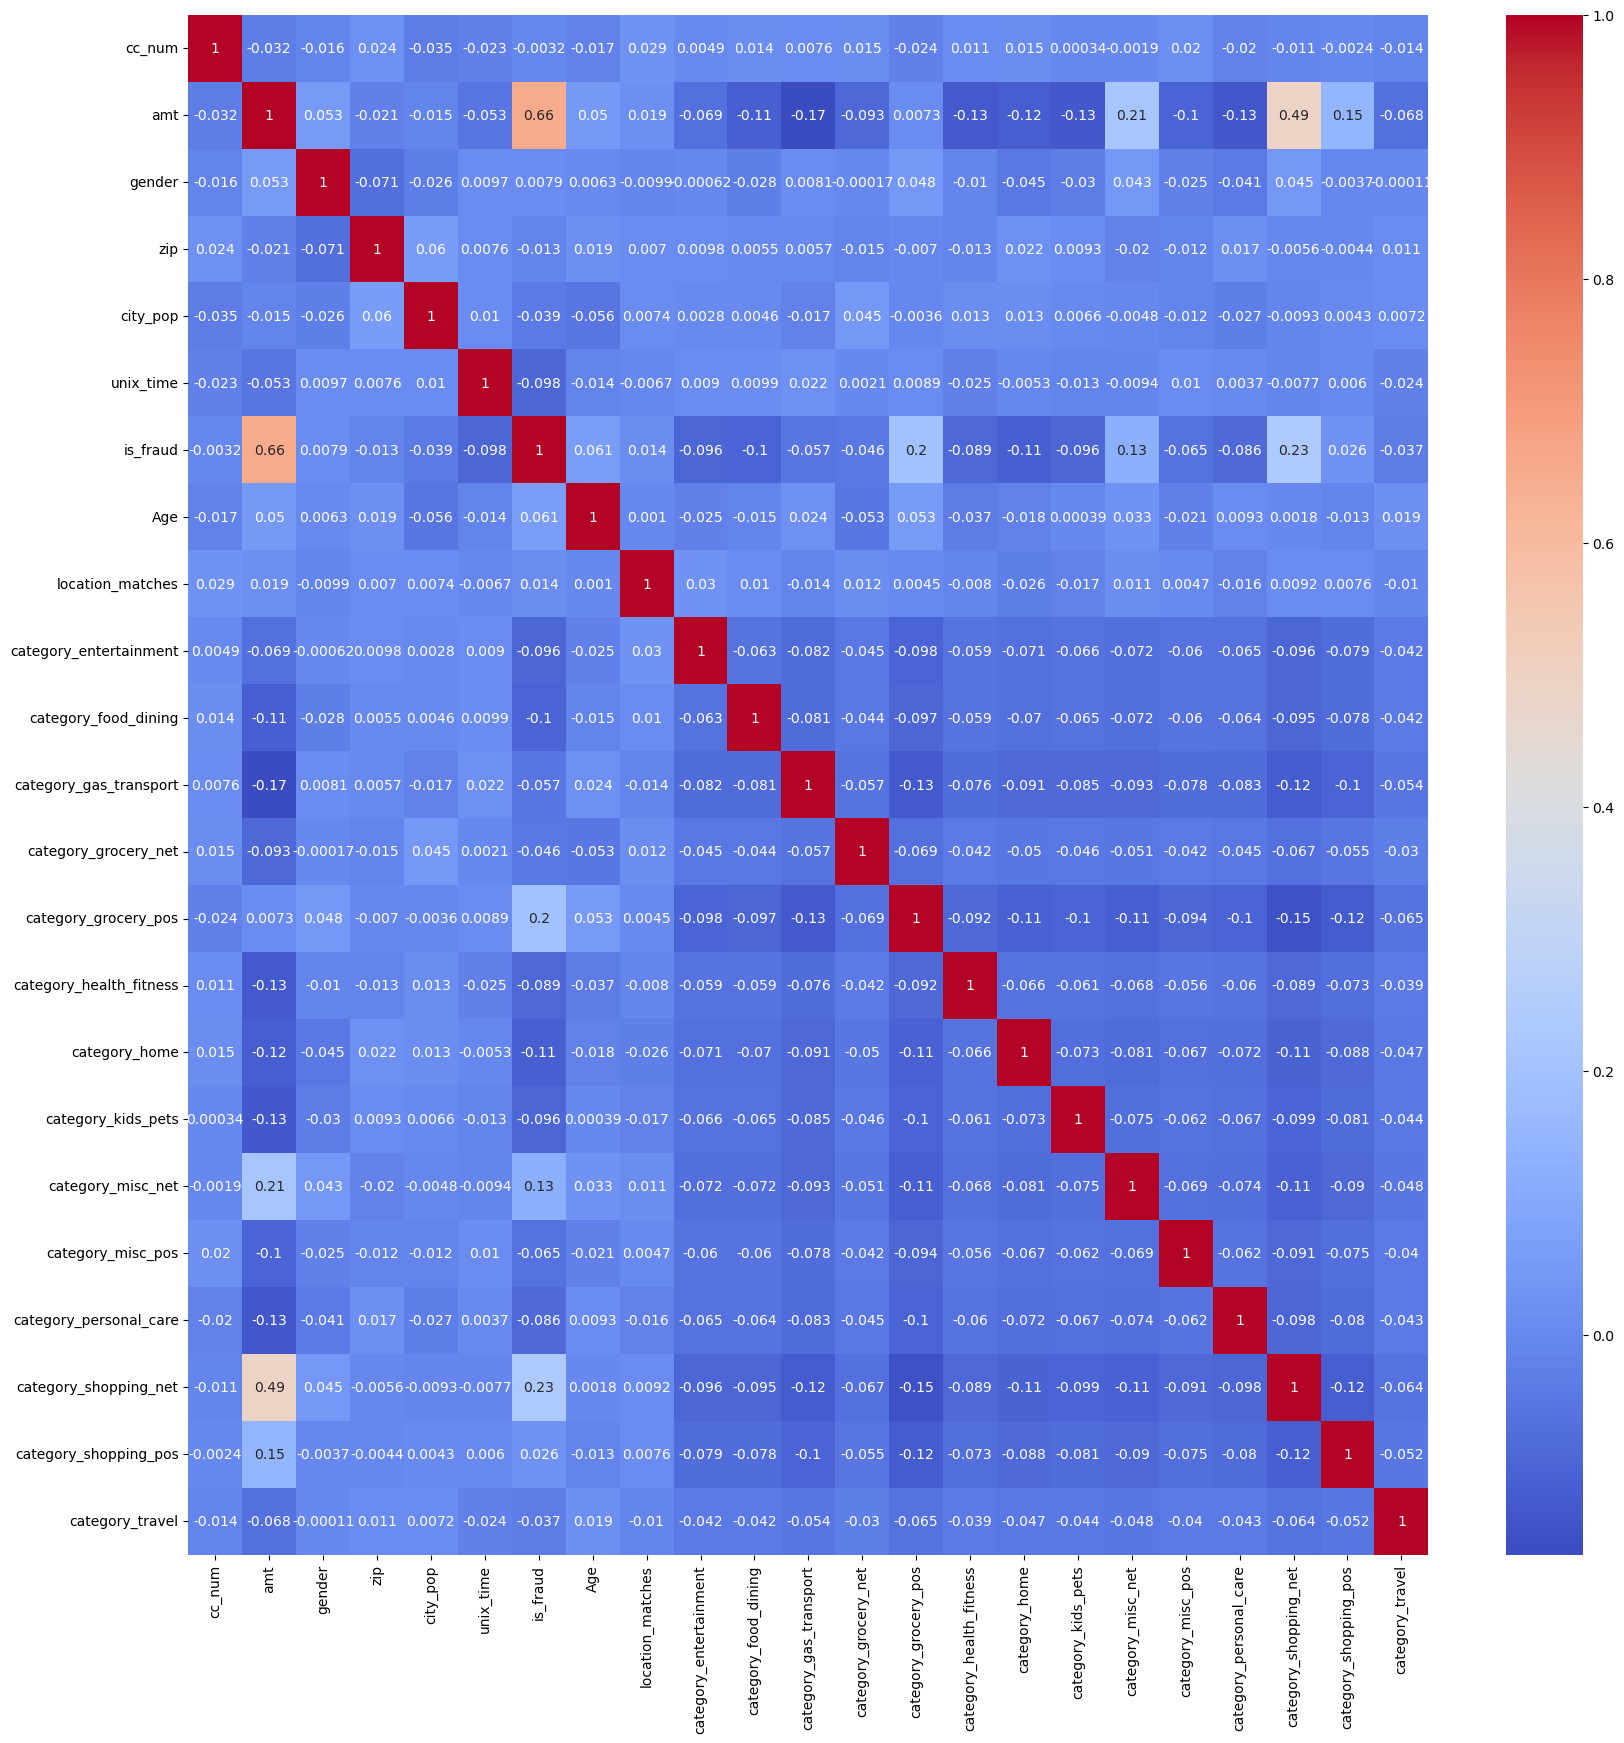

In [ ]:
# Heatmap
plt.figure(figsize=[20,20])
sns.heatmap( test_under.corr(numeric_only=True),annot=True, cmap='coolwarm')

In [ ]:
train.dtypes[train.dtypes == 'object']
#train['job'].value_counts()

merchant      object
first         object
last          object
street        object
state         object
job           object
trans_num     object
Trans_Time    object
dtype: object

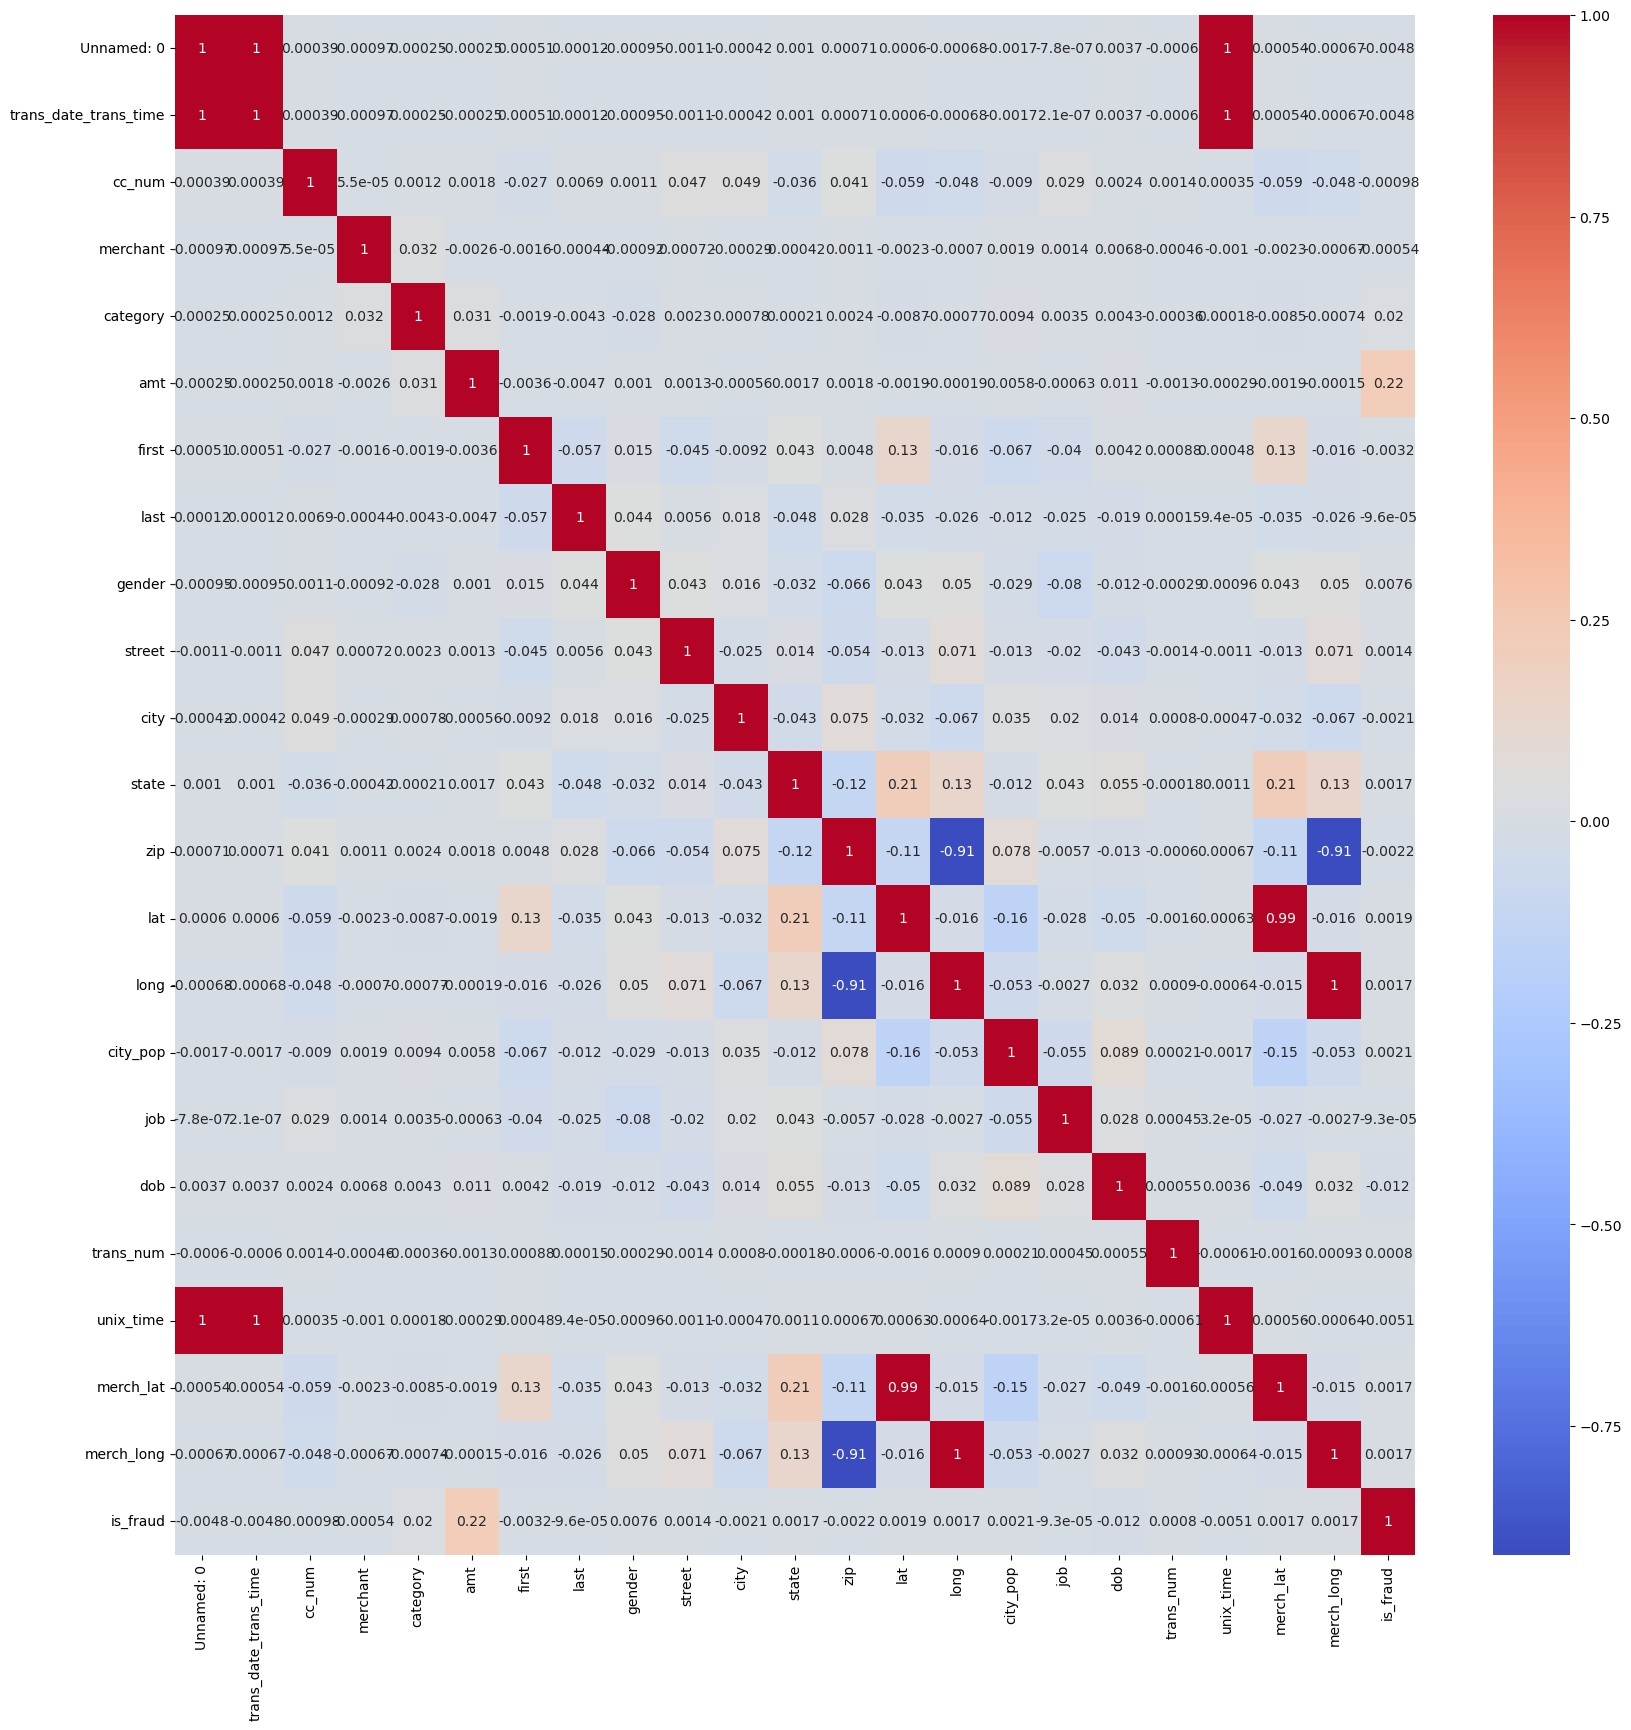

In [ ]:

# 1. Identify object type columns
object_cols = train.columns[train.dtypes == 'object']
# 2. Convert them to numeric form using Label Encoding
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le
# 3. Calculate correlation for the entire dataframe, including the newly encoded columns
correlation_matrix = train.corr()
# Heatmap for visualization
plt.figure(figsize=[20,20])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import pycaret
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)